In [129]:
%pylab inline


from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##### датасет для задачи регрессии Boston Housing, 

##### необходимо предсказать стоимость дома по 13 признакам.

In [74]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [3]:
print(data.DESCR[:1500])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

____________

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### 1. Исследовать данные. (1 балл)

нарисовать 13 картинок, которые покажут зависимость целевой переменной (таргета, игрека, y) от каждого из признаков.

Hint. используйте https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

Text(0.5,0,'Преступность')

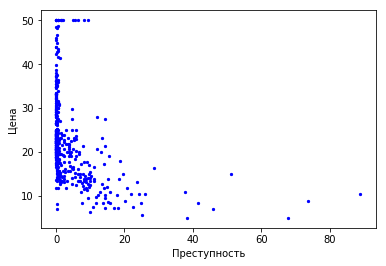

In [19]:
plt.scatter(df.CRIM, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Преступность')

Text(0.5,0,'Жилая территория')

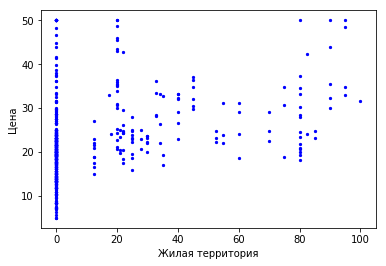

In [20]:
plt.scatter(df.ZN, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Жилая территория')

Text(0.5,0,'Акры, не выставленные на продажу')

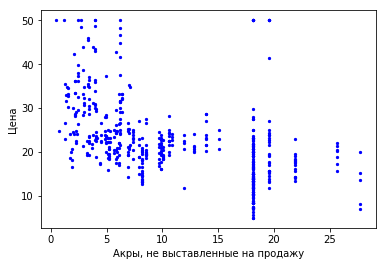

In [24]:
plt.scatter(df.INDUS, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Акры, не выставленные на продажу')

Text(0.5,0,'Постоянная Чарльза-Ривера')

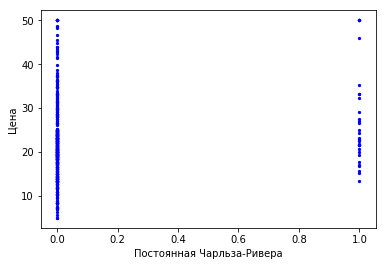

In [23]:
plt.scatter(df.CHAS, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Постоянная Чарльза-Ривера')

Text(0.5,0,'Концентрация оксида азота')

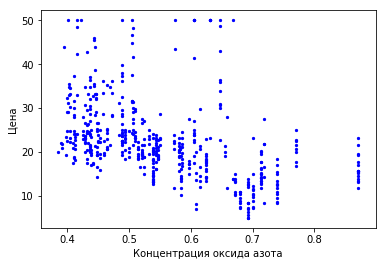

In [25]:
plt.scatter(df.NOX, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Концентрация оксида азота')

Text(0.5,0,'Количество комнат(в среднем)')

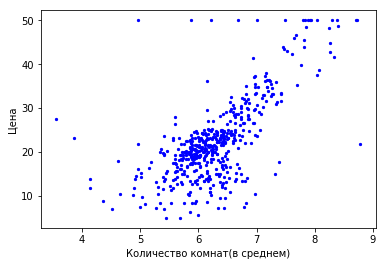

In [26]:
plt.scatter(df.RM, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Количество комнат(в среднем)')

Text(0.5,0,'Дома, построенные до 1940')

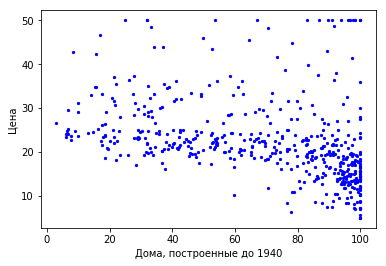

In [30]:
plt.scatter(df.AGE, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Дома, построенные до 1940')

Text(0.5,0,'Расстояние до пяти торговых центров Бостона')

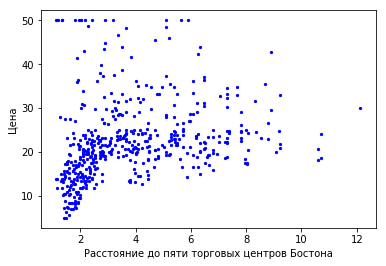

In [32]:
plt.scatter(df.DIS, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Расстояние до пяти торговых центров Бостона')

Text(0.5,0,'Доступность метро')

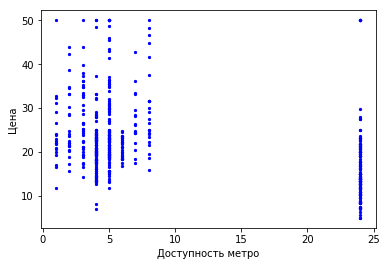

In [33]:
plt.scatter(df.RAD, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Доступность метро')

Text(0.5,0,'Величина налога на 10 долларов')

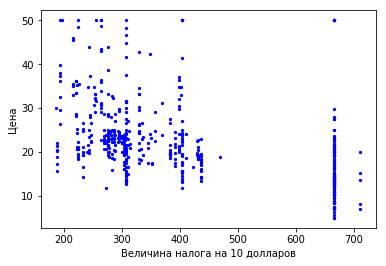

In [34]:
plt.scatter(df.TAX, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Величина налога на 10 долларов')

Text(0.5,0,'Отношение количество учеников к количеству учителей')

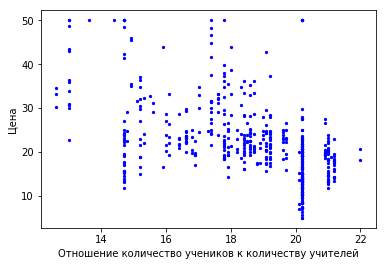

In [35]:
plt.scatter(df.PTRATIO, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Отношение количество учеников к количеству учителей')

Text(0.5,0,'Доля темнокожих в городе')

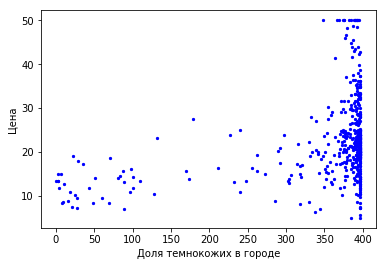

In [42]:
plt.scatter(df.B, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Доля темнокожих в городе')

Text(0.5,0,'Процент бедных')

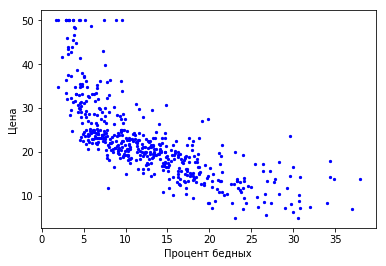

In [43]:
plt.scatter(df.LSTAT, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Процент бедных')

##### 2. Обучить регрессию. (1 балл)

Обучите любую линейную регрессию из sklearn. Померить качество на тестовой части по метрикам RMSE, R2.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)
# не меняйте рандом стейт! - он поможет сделать вычисления воспроизводимыми

In [40]:
regressor = LinearRegression()

In [41]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.930661915979766, 0.6684825753971617)

##### 3. Сделайте крутую фичу. (1 балл)

Вернитесь к скатерплотам. Если вы правильно все построили - то вы увидите что один из признаков (LSTAT) как то зависит от y. Сделайте спрямляющее преобразование (добавьте новый признак) и обучите регрессию и померийте снова качество по метрикам RMSE, R2. если все сделали правильно, то кажется что оно должно вырасти

Text(0.5,0,'Процент бедных')

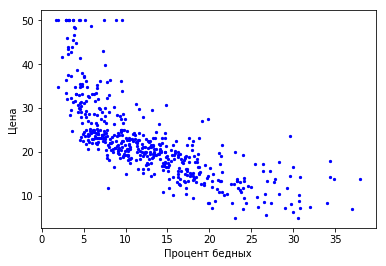

In [46]:
plt.scatter(df.LSTAT, y, s=5, c='b')
plt.ylabel('Цена')
plt.xlabel('Процент бедных')

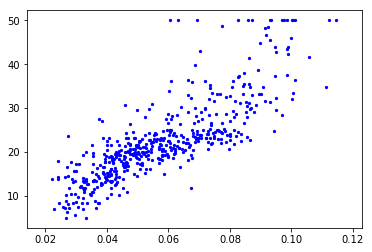

In [50]:
plt.scatter(1/(df.LSTAT+7), y, s=5, c='b')

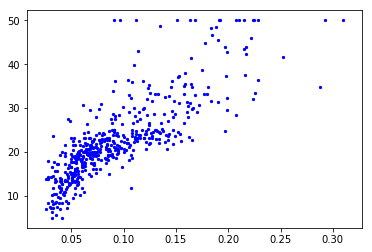

In [69]:
dff=df.copy()
dff['newcoolfeature']=1/(df.LSTAT+1.5)#Добавляем новый признак
plt.scatter(dff.newcoolfeature, y, s=5, c='b')

In [70]:
#Переобучение регрессии
Xtrain, Xtest, ytrain, ytest = train_test_split(dff.values, y, test_size=0.2, random_state=42)  
regressor1= LinearRegression()
regressor1.fit(Xtrain, ytrain)
ypred = regressor1.predict(Xtest)
np.sqrt(mean_squared_error(ytest, ypred)), r2_score(ytest, ypred)

(4.273812947094451, 0.7509268399965128)

> добейтесь качества по R2

- 0.751


##### 4. задание про кросс-валидацию 

выберите оптимальный параметр регуляризации на ridge с помощью кросс-валидации на трейне. померийте качество на тесте. Увеличелось ли оно на метриках?

In [103]:
dfff=df.copy()
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(dfff.values, y, test_size=0.2, random_state=42) 
regressor2= RidgeCV(alphas=[0.01, 0.05, 0.1, 1.0])#RidgeCV сама подбирает оптимальный гиперпаратметр при кроссвалидации
regressor2.fit(Xtrain1, ytrain1)
ypred1 = regressor2.predict(Xtest1)
np.sqrt(mean_squared_error(ytest1, ypred1)), r2_score(ytest1, ypred1)

(4.930720740414921, 0.6684746651238932)

In [121]:
regressor2.alpha_ #оптимальный гиперпараметр

0.01

##### 5. задание про пайплайн

Используйте Pipeline из пакета sklearn.
сделайте поиск по параметрам (GridSearch), автоматически выберете какой способ нормировки признаков (минмакс скейлинг, стандарт скейлер) работает лучше, добавьте полиномиальных признаков, автоматически выберите модель (ридж лассо или просто регрессия) и регуляризацию к ней (если нужно).

In [151]:
pipe = Pipeline([('norma', StandardScaler()),('plnm', PolynomialFeatures()),('mdl', LinearRegression())])

In [152]:
param_grid = [{'norma':[StandardScaler(),MinMaxScaler()],'mdl':[LassoCV(alphas=[0.01, 0.05, 0.1, 1.0]),RidgeCV(alphas=[0.01, 0.05, 0.1, 1.0])]}]

In [153]:
grid = GridSearchCV(pipe, param_grid=param_grid)

In [154]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(dfff.values, y, test_size=0.2, random_state=42)


In [155]:
grid.fit(Xtrain2, ytrain2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('norma', StandardScaler(copy=True, with_mean=True, with_std=True)), ('plnm', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('mdl', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'norma': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))], 'mdl': [LassoCV(alphas=[0.01, 0.05, 0.1, 1.0], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positiv...one, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [164]:
ypred2 =grid.predict(Xtest2)
np.sqrt(mean_squared_error(ytest2, ypred2)), r2_score(ytest2, ypred2)

(3.35067750672732, 0.8469049424390972)

> добейтесь качества по R2

- 0.811


In [162]:
print("Наилучшее значение правильности перекрестной проверки:{:.2f}".format(grid.best_score_)) 
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test))) 
print("Наилучшие параметры: {}".format(grid.best_params_))

Наилучшее значение правильности перекрестной проверки:0.85
Правильность на тестовом наборе: 0.85
Наилучшие параметры: {'mdl': RidgeCV(alphas=[0.01, 0.05, 0.1, 1.0], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False), 'norma': MinMaxScaler(copy=True, feature_range=(0, 1))}
